In [110]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [91]:
df = pd.read_csv('./Steels_kaggle.csv')
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [99]:
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', ' Temperature (°C)']]

Y = df[' 0.2% Proof Stress (MPa)']
delta = (max(Y) - min(Y))/100
Y = Y // delta
Y

0      51.0
1      50.0
2      50.0
3      52.0
4      47.0
       ... 
910    40.0
911    36.0
912    33.0
913    31.0
914    30.0
Name:  0.2% Proof Stress (MPa), Length: 915, dtype: float64

In [100]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, shuffle=True, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [101]:
model = keras.models.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [102]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3), loss="mean_squared_error")

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), verbose=2, workers=8)

Epoch 1/1000


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


19/19 - 0s - loss: 1905.6022 - val_loss: 161.7152 - 274ms/epoch - 14ms/step
Epoch 2/1000
19/19 - 0s - loss: 128.1291 - val_loss: 74.8629 - 52ms/epoch - 3ms/step
Epoch 3/1000
19/19 - 0s - loss: 88.2788 - val_loss: 87.8987 - 49ms/epoch - 3ms/step
Epoch 4/1000
19/19 - 0s - loss: 84.7598 - val_loss: 73.7529 - 51ms/epoch - 3ms/step
Epoch 5/1000
19/19 - 0s - loss: 72.6099 - val_loss: 71.9080 - 50ms/epoch - 3ms/step
Epoch 6/1000
19/19 - 0s - loss: 71.6825 - val_loss: 62.1484 - 51ms/epoch - 3ms/step
Epoch 7/1000
19/19 - 0s - loss: 69.0340 - val_loss: 57.6459 - 44ms/epoch - 2ms/step
Epoch 8/1000
19/19 - 0s - loss: 67.1445 - val_loss: 54.0731 - 50ms/epoch - 3ms/step
Epoch 9/1000
19/19 - 0s - loss: 67.3726 - val_loss: 54.8335 - 50ms/epoch - 3ms/step
Epoch 10/1000
19/19 - 0s - loss: 64.0745 - val_loss: 61.2930 - 42ms/epoch - 2ms/step
Epoch 11/1000
19/19 - 0s - loss: 69.5614 - val_loss: 157.2533 - 48ms/epoch - 3ms/step
Epoch 12/1000
19/19 - 0s - loss: 69.1058 - val_loss: 55.7881 - 44ms/epoch - 2ms/

Epoch 98/1000
19/19 - 0s - loss: 38.9457 - val_loss: 41.5648 - 34ms/epoch - 2ms/step
Epoch 99/1000
19/19 - 0s - loss: 37.3265 - val_loss: 28.9303 - 32ms/epoch - 2ms/step
Epoch 100/1000
19/19 - 0s - loss: 37.4045 - val_loss: 44.5503 - 33ms/epoch - 2ms/step
Epoch 101/1000
19/19 - 0s - loss: 38.3248 - val_loss: 28.8505 - 32ms/epoch - 2ms/step
Epoch 102/1000
19/19 - 0s - loss: 38.8430 - val_loss: 42.8514 - 32ms/epoch - 2ms/step
Epoch 103/1000
19/19 - 0s - loss: 40.4351 - val_loss: 31.8262 - 32ms/epoch - 2ms/step
Epoch 104/1000
19/19 - 0s - loss: 34.9596 - val_loss: 29.7200 - 33ms/epoch - 2ms/step
Epoch 105/1000
19/19 - 0s - loss: 36.2656 - val_loss: 29.4680 - 33ms/epoch - 2ms/step
Epoch 106/1000
19/19 - 0s - loss: 37.4445 - val_loss: 40.4619 - 32ms/epoch - 2ms/step
Epoch 107/1000
19/19 - 0s - loss: 36.8869 - val_loss: 32.8460 - 35ms/epoch - 2ms/step
Epoch 108/1000
19/19 - 0s - loss: 41.9367 - val_loss: 33.0628 - 33ms/epoch - 2ms/step
Epoch 109/1000
19/19 - 0s - loss: 33.4615 - val_loss: 47

Epoch 194/1000
19/19 - 0s - loss: 28.1231 - val_loss: 57.3283 - 34ms/epoch - 2ms/step
Epoch 195/1000
19/19 - 0s - loss: 31.0752 - val_loss: 23.7322 - 34ms/epoch - 2ms/step
Epoch 196/1000
19/19 - 0s - loss: 25.9292 - val_loss: 43.3518 - 33ms/epoch - 2ms/step
Epoch 197/1000
19/19 - 0s - loss: 28.4720 - val_loss: 21.5949 - 34ms/epoch - 2ms/step
Epoch 198/1000
19/19 - 0s - loss: 27.3015 - val_loss: 47.9917 - 35ms/epoch - 2ms/step
Epoch 199/1000
19/19 - 0s - loss: 24.9993 - val_loss: 42.9221 - 32ms/epoch - 2ms/step
Epoch 200/1000
19/19 - 0s - loss: 28.8609 - val_loss: 59.9684 - 33ms/epoch - 2ms/step
Epoch 201/1000
19/19 - 0s - loss: 32.7480 - val_loss: 33.7705 - 33ms/epoch - 2ms/step
Epoch 202/1000
19/19 - 0s - loss: 27.2147 - val_loss: 56.4551 - 32ms/epoch - 2ms/step
Epoch 203/1000
19/19 - 0s - loss: 36.5165 - val_loss: 29.3045 - 32ms/epoch - 2ms/step
Epoch 204/1000
19/19 - 0s - loss: 31.5335 - val_loss: 75.3158 - 33ms/epoch - 2ms/step
Epoch 205/1000
19/19 - 0s - loss: 33.9111 - val_loss: 

Epoch 290/1000
19/19 - 0s - loss: 27.4112 - val_loss: 20.3952 - 35ms/epoch - 2ms/step
Epoch 291/1000
19/19 - 0s - loss: 20.6531 - val_loss: 19.5454 - 38ms/epoch - 2ms/step
Epoch 292/1000
19/19 - 0s - loss: 28.9371 - val_loss: 31.2961 - 36ms/epoch - 2ms/step
Epoch 293/1000
19/19 - 0s - loss: 24.2023 - val_loss: 23.0932 - 36ms/epoch - 2ms/step
Epoch 294/1000
19/19 - 0s - loss: 21.0440 - val_loss: 21.2034 - 38ms/epoch - 2ms/step
Epoch 295/1000
19/19 - 0s - loss: 23.0531 - val_loss: 25.5266 - 34ms/epoch - 2ms/step
Epoch 296/1000
19/19 - 0s - loss: 27.8819 - val_loss: 37.5619 - 32ms/epoch - 2ms/step
Epoch 297/1000
19/19 - 0s - loss: 24.1807 - val_loss: 21.7386 - 36ms/epoch - 2ms/step
Epoch 298/1000
19/19 - 0s - loss: 25.7995 - val_loss: 50.3178 - 33ms/epoch - 2ms/step
Epoch 299/1000
19/19 - 0s - loss: 25.5568 - val_loss: 27.7714 - 35ms/epoch - 2ms/step
Epoch 300/1000
19/19 - 0s - loss: 20.1108 - val_loss: 30.4768 - 33ms/epoch - 2ms/step
Epoch 301/1000
19/19 - 0s - loss: 21.9884 - val_loss: 

Epoch 386/1000
19/19 - 0s - loss: 19.5738 - val_loss: 24.9531 - 35ms/epoch - 2ms/step
Epoch 387/1000
19/19 - 0s - loss: 29.0172 - val_loss: 20.4120 - 33ms/epoch - 2ms/step
Epoch 388/1000
19/19 - 0s - loss: 23.4979 - val_loss: 18.2227 - 37ms/epoch - 2ms/step
Epoch 389/1000
19/19 - 0s - loss: 21.6644 - val_loss: 35.5539 - 42ms/epoch - 2ms/step
Epoch 390/1000
19/19 - 0s - loss: 22.8080 - val_loss: 21.5695 - 37ms/epoch - 2ms/step
Epoch 391/1000
19/19 - 0s - loss: 19.8471 - val_loss: 41.3453 - 38ms/epoch - 2ms/step
Epoch 392/1000
19/19 - 0s - loss: 22.5943 - val_loss: 22.3352 - 37ms/epoch - 2ms/step
Epoch 393/1000
19/19 - 0s - loss: 19.5448 - val_loss: 25.5416 - 34ms/epoch - 2ms/step
Epoch 394/1000
19/19 - 0s - loss: 24.0388 - val_loss: 21.9128 - 33ms/epoch - 2ms/step
Epoch 395/1000
19/19 - 0s - loss: 21.3111 - val_loss: 29.6722 - 34ms/epoch - 2ms/step
Epoch 396/1000
19/19 - 0s - loss: 19.6707 - val_loss: 24.3853 - 37ms/epoch - 2ms/step
Epoch 397/1000
19/19 - 0s - loss: 19.5005 - val_loss: 

Epoch 482/1000
19/19 - 0s - loss: 20.5581 - val_loss: 17.1495 - 35ms/epoch - 2ms/step
Epoch 483/1000
19/19 - 0s - loss: 20.8430 - val_loss: 19.8277 - 35ms/epoch - 2ms/step
Epoch 484/1000
19/19 - 0s - loss: 18.6927 - val_loss: 16.9051 - 33ms/epoch - 2ms/step
Epoch 485/1000
19/19 - 0s - loss: 22.5078 - val_loss: 20.2453 - 42ms/epoch - 2ms/step
Epoch 486/1000
19/19 - 0s - loss: 18.5693 - val_loss: 23.8858 - 42ms/epoch - 2ms/step
Epoch 487/1000
19/19 - 0s - loss: 23.5398 - val_loss: 27.5147 - 48ms/epoch - 3ms/step
Epoch 488/1000
19/19 - 0s - loss: 24.0199 - val_loss: 32.2539 - 38ms/epoch - 2ms/step
Epoch 489/1000
19/19 - 0s - loss: 21.1689 - val_loss: 17.6638 - 37ms/epoch - 2ms/step
Epoch 490/1000
19/19 - 0s - loss: 19.9316 - val_loss: 26.7489 - 34ms/epoch - 2ms/step
Epoch 491/1000
19/19 - 0s - loss: 18.0369 - val_loss: 26.4454 - 35ms/epoch - 2ms/step
Epoch 492/1000
19/19 - 0s - loss: 21.3779 - val_loss: 21.9881 - 35ms/epoch - 2ms/step
Epoch 493/1000
19/19 - 0s - loss: 21.1809 - val_loss: 

Epoch 578/1000
19/19 - 0s - loss: 21.8345 - val_loss: 28.1334 - 37ms/epoch - 2ms/step
Epoch 579/1000
19/19 - 0s - loss: 20.4988 - val_loss: 17.0821 - 36ms/epoch - 2ms/step
Epoch 580/1000
19/19 - 0s - loss: 17.1393 - val_loss: 18.5314 - 36ms/epoch - 2ms/step
Epoch 581/1000
19/19 - 0s - loss: 21.9566 - val_loss: 16.9811 - 34ms/epoch - 2ms/step
Epoch 582/1000
19/19 - 0s - loss: 22.4267 - val_loss: 18.4767 - 33ms/epoch - 2ms/step
Epoch 583/1000
19/19 - 0s - loss: 17.0671 - val_loss: 22.3370 - 35ms/epoch - 2ms/step
Epoch 584/1000
19/19 - 0s - loss: 23.0769 - val_loss: 18.1367 - 37ms/epoch - 2ms/step
Epoch 585/1000
19/19 - 0s - loss: 18.2838 - val_loss: 30.0279 - 36ms/epoch - 2ms/step
Epoch 586/1000
19/19 - 0s - loss: 23.1823 - val_loss: 20.0281 - 35ms/epoch - 2ms/step
Epoch 587/1000
19/19 - 0s - loss: 21.7494 - val_loss: 17.7721 - 40ms/epoch - 2ms/step
Epoch 588/1000
19/19 - 0s - loss: 19.1324 - val_loss: 23.2457 - 40ms/epoch - 2ms/step
Epoch 589/1000
19/19 - 0s - loss: 18.7438 - val_loss: 

Epoch 674/1000
19/19 - 0s - loss: 19.8100 - val_loss: 16.5897 - 33ms/epoch - 2ms/step
Epoch 675/1000
19/19 - 0s - loss: 17.6129 - val_loss: 18.1003 - 32ms/epoch - 2ms/step
Epoch 676/1000
19/19 - 0s - loss: 16.5491 - val_loss: 16.7609 - 36ms/epoch - 2ms/step
Epoch 677/1000
19/19 - 0s - loss: 23.7634 - val_loss: 19.5626 - 33ms/epoch - 2ms/step
Epoch 678/1000
19/19 - 0s - loss: 17.7360 - val_loss: 18.1447 - 34ms/epoch - 2ms/step
Epoch 679/1000
19/19 - 0s - loss: 18.9214 - val_loss: 30.2173 - 35ms/epoch - 2ms/step
Epoch 680/1000
19/19 - 0s - loss: 19.9935 - val_loss: 20.0946 - 32ms/epoch - 2ms/step
Epoch 681/1000
19/19 - 0s - loss: 20.0744 - val_loss: 28.6278 - 35ms/epoch - 2ms/step
Epoch 682/1000
19/19 - 0s - loss: 17.2286 - val_loss: 17.0406 - 38ms/epoch - 2ms/step
Epoch 683/1000
19/19 - 0s - loss: 18.2482 - val_loss: 74.5199 - 40ms/epoch - 2ms/step
Epoch 684/1000
19/19 - 0s - loss: 26.5604 - val_loss: 18.6667 - 37ms/epoch - 2ms/step
Epoch 685/1000
19/19 - 0s - loss: 18.8985 - val_loss: 

Epoch 770/1000
19/19 - 0s - loss: 17.9320 - val_loss: 29.4059 - 33ms/epoch - 2ms/step
Epoch 771/1000
19/19 - 0s - loss: 24.8240 - val_loss: 20.2790 - 35ms/epoch - 2ms/step
Epoch 772/1000
19/19 - 0s - loss: 16.2259 - val_loss: 29.7542 - 32ms/epoch - 2ms/step
Epoch 773/1000
19/19 - 0s - loss: 23.1041 - val_loss: 20.2963 - 36ms/epoch - 2ms/step
Epoch 774/1000
19/19 - 0s - loss: 18.3708 - val_loss: 21.6988 - 34ms/epoch - 2ms/step
Epoch 775/1000
19/19 - 0s - loss: 19.5686 - val_loss: 17.7443 - 35ms/epoch - 2ms/step
Epoch 776/1000
19/19 - 0s - loss: 16.2600 - val_loss: 17.9974 - 46ms/epoch - 2ms/step
Epoch 777/1000
19/19 - 0s - loss: 23.9459 - val_loss: 17.9620 - 40ms/epoch - 2ms/step
Epoch 778/1000
19/19 - 0s - loss: 18.5928 - val_loss: 24.9586 - 34ms/epoch - 2ms/step
Epoch 779/1000
19/19 - 0s - loss: 18.1082 - val_loss: 17.7865 - 37ms/epoch - 2ms/step
Epoch 780/1000
19/19 - 0s - loss: 17.0634 - val_loss: 18.2231 - 34ms/epoch - 2ms/step
Epoch 781/1000
19/19 - 0s - loss: 18.2617 - val_loss: 

Epoch 866/1000
19/19 - 0s - loss: 24.3404 - val_loss: 24.6865 - 40ms/epoch - 2ms/step
Epoch 867/1000
19/19 - 0s - loss: 19.8851 - val_loss: 38.2620 - 36ms/epoch - 2ms/step
Epoch 868/1000
19/19 - 0s - loss: 21.2804 - val_loss: 15.7612 - 38ms/epoch - 2ms/step
Epoch 869/1000
19/19 - 0s - loss: 17.3565 - val_loss: 20.3966 - 40ms/epoch - 2ms/step
Epoch 870/1000
19/19 - 0s - loss: 17.8202 - val_loss: 82.7267 - 37ms/epoch - 2ms/step
Epoch 871/1000
19/19 - 0s - loss: 37.5443 - val_loss: 21.9977 - 37ms/epoch - 2ms/step
Epoch 872/1000
19/19 - 0s - loss: 19.1570 - val_loss: 16.2699 - 39ms/epoch - 2ms/step
Epoch 873/1000
19/19 - 0s - loss: 22.3909 - val_loss: 21.7999 - 35ms/epoch - 2ms/step
Epoch 874/1000
19/19 - 0s - loss: 19.8747 - val_loss: 19.3303 - 38ms/epoch - 2ms/step
Epoch 875/1000
19/19 - 0s - loss: 16.0847 - val_loss: 18.6172 - 38ms/epoch - 2ms/step
Epoch 876/1000
19/19 - 0s - loss: 18.0099 - val_loss: 19.7213 - 42ms/epoch - 2ms/step
Epoch 877/1000
19/19 - 0s - loss: 16.6932 - val_loss: 

Epoch 962/1000
19/19 - 0s - loss: 14.8656 - val_loss: 26.3299 - 34ms/epoch - 2ms/step
Epoch 963/1000
19/19 - 0s - loss: 15.7318 - val_loss: 16.4550 - 35ms/epoch - 2ms/step
Epoch 964/1000
19/19 - 0s - loss: 19.1766 - val_loss: 17.7906 - 37ms/epoch - 2ms/step
Epoch 965/1000
19/19 - 0s - loss: 17.4741 - val_loss: 15.9040 - 36ms/epoch - 2ms/step
Epoch 966/1000
19/19 - 0s - loss: 19.4014 - val_loss: 19.5851 - 37ms/epoch - 2ms/step
Epoch 967/1000
19/19 - 0s - loss: 17.3917 - val_loss: 20.1845 - 35ms/epoch - 2ms/step
Epoch 968/1000
19/19 - 0s - loss: 18.1598 - val_loss: 22.2874 - 44ms/epoch - 2ms/step
Epoch 969/1000
19/19 - 0s - loss: 21.0860 - val_loss: 17.1699 - 41ms/epoch - 2ms/step
Epoch 970/1000
19/19 - 0s - loss: 17.0627 - val_loss: 21.2176 - 37ms/epoch - 2ms/step
Epoch 971/1000
19/19 - 0s - loss: 16.1637 - val_loss: 30.0322 - 38ms/epoch - 2ms/step
Epoch 972/1000
19/19 - 0s - loss: 17.8050 - val_loss: 16.4897 - 34ms/epoch - 2ms/step
Epoch 973/1000
19/19 - 0s - loss: 16.7803 - val_loss: 

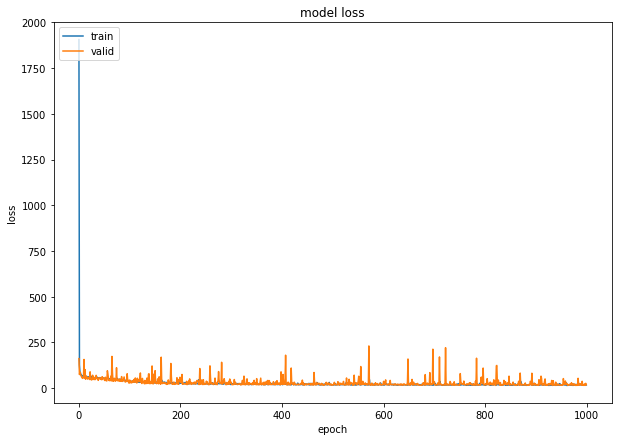

In [103]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [104]:
mse_test = mse((y_test + 0.5)*delta, (model.predict(X_test) + 0.5)*delta, squared=False)
mse_train = mse((y_train + 0.5)*delta, (model.predict(X_train) + 0.5)*delta, squared=False)
print("MSE for test is", mse_test, "and MSE for train is", mse_train)

MSE for test is 28.430350523261684 and MSE for train is 25.179160963785105


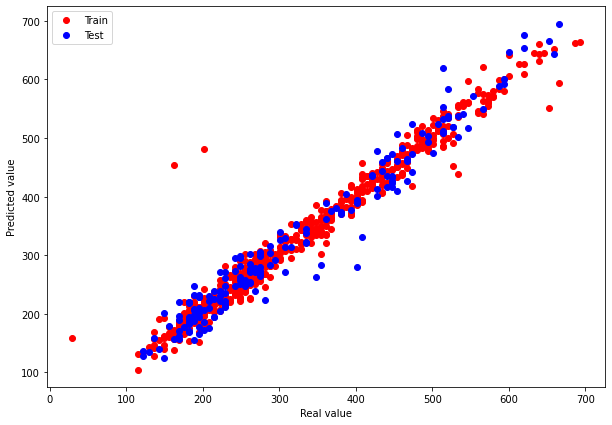

In [105]:
fig = plt.figure(figsize=(10,7))

plt.plot((y_train + 0.5)*delta, (model.predict(X_train) + 0.5)*delta, 'or', label='Train')
plt.plot((y_test + 0.5)*delta, (model.predict(X_test) + 0.5)*delta, 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

In [112]:
mses = pd.DataFrame(columns=['nsteps', 'mse'])

for nsteps in np.arange(50, 150, 10):
    Y = df[' 0.2% Proof Stress (MPa)']
    delta = (max(Y) - min(Y))/nsteps
    Y = Y // delta
    model = keras.models.Sequential([
        keras.layers.Dense(10, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1)])
    model.compile(optimizer=keras.optimizers.SGD(lr=1e-3), loss="mean_squared_error")

    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), verbose=0, workers=8)
    
    new_row = pd.Series({'nsteps':nsteps, 'mse': mse((y_test + 0.5)*delta, (model.predict(X_test) + 0.5)*delta, squared=False)})
    print(nsteps)
    mses = pd.concat([mses, new_row.to_frame().T], ignore_index=True)
            
mses = mses.sort_values(by=['mse'], ascending=True, ignore_index=True)
mses

/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


50


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


60


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


70


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


80


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


90


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


100


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


110


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


120


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


130


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


140


,nsteps,mse
0,130.0,18.687484
1,140.0,18.830005
2,110.0,20.591144
3,120.0,30.208379
4,90.0,40.0898
5,80.0,41.426628
6,100.0,42.442369
7,70.0,51.031896
8,50.0,57.77899
9,60.0,152.232366


In [119]:
Y = df[' 0.2% Proof Stress (MPa)']
delta = (max(Y) - min(Y))/130
Y = Y // delta

In [120]:
model = keras.models.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [121]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3), loss="mean_squared_error")

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), verbose=2, workers=8)

Epoch 1/1000


/home/user/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


19/19 - 0s - loss: 1331.0779 - val_loss: 263.8285 - 238ms/epoch - 13ms/step
Epoch 2/1000
19/19 - 0s - loss: 132.8689 - val_loss: 155.7107 - 36ms/epoch - 2ms/step
Epoch 3/1000
19/19 - 0s - loss: 89.6228 - val_loss: 70.9160 - 35ms/epoch - 2ms/step
Epoch 4/1000
19/19 - 0s - loss: 81.5841 - val_loss: 65.8055 - 36ms/epoch - 2ms/step
Epoch 5/1000
19/19 - 0s - loss: 75.7237 - val_loss: 106.5010 - 33ms/epoch - 2ms/step
Epoch 6/1000
19/19 - 0s - loss: 71.4567 - val_loss: 58.6585 - 35ms/epoch - 2ms/step
Epoch 7/1000
19/19 - 0s - loss: 69.0172 - val_loss: 75.7590 - 36ms/epoch - 2ms/step
Epoch 8/1000
19/19 - 0s - loss: 71.9035 - val_loss: 57.0973 - 33ms/epoch - 2ms/step
Epoch 9/1000
19/19 - 0s - loss: 70.5651 - val_loss: 54.1892 - 34ms/epoch - 2ms/step
Epoch 10/1000
19/19 - 0s - loss: 63.7223 - val_loss: 53.6157 - 34ms/epoch - 2ms/step
Epoch 11/1000
19/19 - 0s - loss: 62.5189 - val_loss: 57.1814 - 36ms/epoch - 2ms/step
Epoch 12/1000
19/19 - 0s - loss: 66.6578 - val_loss: 103.7135 - 35ms/epoch - 2m

Epoch 98/1000
19/19 - 0s - loss: 27.5646 - val_loss: 24.8793 - 35ms/epoch - 2ms/step
Epoch 99/1000
19/19 - 0s - loss: 26.5395 - val_loss: 25.0998 - 35ms/epoch - 2ms/step
Epoch 100/1000
19/19 - 0s - loss: 28.2720 - val_loss: 24.6032 - 34ms/epoch - 2ms/step
Epoch 101/1000
19/19 - 0s - loss: 26.4800 - val_loss: 22.9429 - 36ms/epoch - 2ms/step
Epoch 102/1000
19/19 - 0s - loss: 26.0175 - val_loss: 154.8007 - 35ms/epoch - 2ms/step
Epoch 103/1000
19/19 - 0s - loss: 35.8838 - val_loss: 36.3253 - 32ms/epoch - 2ms/step
Epoch 104/1000
19/19 - 0s - loss: 27.5577 - val_loss: 28.9624 - 33ms/epoch - 2ms/step
Epoch 105/1000
19/19 - 0s - loss: 27.7906 - val_loss: 70.5334 - 33ms/epoch - 2ms/step
Epoch 106/1000
19/19 - 0s - loss: 29.2099 - val_loss: 23.5977 - 34ms/epoch - 2ms/step
Epoch 107/1000
19/19 - 0s - loss: 28.0369 - val_loss: 22.2181 - 32ms/epoch - 2ms/step
Epoch 108/1000
19/19 - 0s - loss: 27.0995 - val_loss: 39.8303 - 32ms/epoch - 2ms/step
Epoch 109/1000
19/19 - 0s - loss: 26.8580 - val_loss: 2

Epoch 194/1000
19/19 - 0s - loss: 23.1428 - val_loss: 22.7023 - 32ms/epoch - 2ms/step
Epoch 195/1000
19/19 - 0s - loss: 22.8399 - val_loss: 19.8324 - 33ms/epoch - 2ms/step
Epoch 196/1000
19/19 - 0s - loss: 23.2809 - val_loss: 18.9809 - 34ms/epoch - 2ms/step
Epoch 197/1000
19/19 - 0s - loss: 24.2797 - val_loss: 19.1133 - 35ms/epoch - 2ms/step
Epoch 198/1000
19/19 - 0s - loss: 23.0727 - val_loss: 122.1941 - 36ms/epoch - 2ms/step
Epoch 199/1000
19/19 - 0s - loss: 30.6794 - val_loss: 17.5657 - 36ms/epoch - 2ms/step
Epoch 200/1000
19/19 - 0s - loss: 23.7979 - val_loss: 27.3016 - 34ms/epoch - 2ms/step
Epoch 201/1000
19/19 - 0s - loss: 26.4551 - val_loss: 20.4241 - 35ms/epoch - 2ms/step
Epoch 202/1000
19/19 - 0s - loss: 24.9880 - val_loss: 18.8240 - 35ms/epoch - 2ms/step
Epoch 203/1000
19/19 - 0s - loss: 22.5505 - val_loss: 18.8300 - 35ms/epoch - 2ms/step
Epoch 204/1000
19/19 - 0s - loss: 24.2274 - val_loss: 17.9174 - 34ms/epoch - 2ms/step
Epoch 205/1000
19/19 - 0s - loss: 21.9657 - val_loss:

Epoch 290/1000
19/19 - 0s - loss: 20.8947 - val_loss: 17.4045 - 33ms/epoch - 2ms/step
Epoch 291/1000
19/19 - 0s - loss: 21.0729 - val_loss: 17.5197 - 33ms/epoch - 2ms/step
Epoch 292/1000
19/19 - 0s - loss: 20.7414 - val_loss: 16.8457 - 35ms/epoch - 2ms/step
Epoch 293/1000
19/19 - 0s - loss: 22.1320 - val_loss: 16.8317 - 34ms/epoch - 2ms/step
Epoch 294/1000
19/19 - 0s - loss: 23.1351 - val_loss: 30.6104 - 34ms/epoch - 2ms/step
Epoch 295/1000
19/19 - 0s - loss: 24.9097 - val_loss: 18.7934 - 35ms/epoch - 2ms/step
Epoch 296/1000
19/19 - 0s - loss: 19.7847 - val_loss: 15.7669 - 33ms/epoch - 2ms/step
Epoch 297/1000
19/19 - 0s - loss: 24.6381 - val_loss: 18.5504 - 32ms/epoch - 2ms/step
Epoch 298/1000
19/19 - 0s - loss: 20.4290 - val_loss: 15.4378 - 33ms/epoch - 2ms/step
Epoch 299/1000
19/19 - 0s - loss: 20.1449 - val_loss: 34.8061 - 34ms/epoch - 2ms/step
Epoch 300/1000
19/19 - 0s - loss: 21.8903 - val_loss: 120.9437 - 33ms/epoch - 2ms/step
Epoch 301/1000
19/19 - 0s - loss: 28.5717 - val_loss:

Epoch 386/1000
19/19 - 0s - loss: 22.5699 - val_loss: 17.0891 - 33ms/epoch - 2ms/step
Epoch 387/1000
19/19 - 0s - loss: 20.1745 - val_loss: 17.9191 - 36ms/epoch - 2ms/step
Epoch 388/1000
19/19 - 0s - loss: 23.0640 - val_loss: 17.2871 - 35ms/epoch - 2ms/step
Epoch 389/1000
19/19 - 0s - loss: 20.3376 - val_loss: 16.3398 - 35ms/epoch - 2ms/step
Epoch 390/1000
19/19 - 0s - loss: 21.2077 - val_loss: 22.5858 - 35ms/epoch - 2ms/step
Epoch 391/1000
19/19 - 0s - loss: 19.9191 - val_loss: 15.3766 - 35ms/epoch - 2ms/step
Epoch 392/1000
19/19 - 0s - loss: 19.4012 - val_loss: 36.2705 - 35ms/epoch - 2ms/step
Epoch 393/1000
19/19 - 0s - loss: 19.9304 - val_loss: 17.8606 - 33ms/epoch - 2ms/step
Epoch 394/1000
19/19 - 0s - loss: 19.6660 - val_loss: 19.1636 - 34ms/epoch - 2ms/step
Epoch 395/1000
19/19 - 0s - loss: 20.1004 - val_loss: 14.9913 - 34ms/epoch - 2ms/step
Epoch 396/1000
19/19 - 0s - loss: 22.5252 - val_loss: 14.9063 - 36ms/epoch - 2ms/step
Epoch 397/1000
19/19 - 0s - loss: 18.2007 - val_loss: 

Epoch 482/1000
19/19 - 0s - loss: 19.0279 - val_loss: 35.7162 - 33ms/epoch - 2ms/step
Epoch 483/1000
19/19 - 0s - loss: 20.7748 - val_loss: 16.9773 - 37ms/epoch - 2ms/step
Epoch 484/1000
19/19 - 0s - loss: 18.4941 - val_loss: 14.8179 - 35ms/epoch - 2ms/step
Epoch 485/1000
19/19 - 0s - loss: 19.8864 - val_loss: 16.4129 - 35ms/epoch - 2ms/step
Epoch 486/1000
19/19 - 0s - loss: 20.1644 - val_loss: 14.5570 - 37ms/epoch - 2ms/step
Epoch 487/1000
19/19 - 0s - loss: 18.8194 - val_loss: 13.6234 - 37ms/epoch - 2ms/step
Epoch 488/1000
19/19 - 0s - loss: 19.4102 - val_loss: 13.8862 - 38ms/epoch - 2ms/step
Epoch 489/1000
19/19 - 0s - loss: 18.6701 - val_loss: 16.5162 - 37ms/epoch - 2ms/step
Epoch 490/1000
19/19 - 0s - loss: 19.6027 - val_loss: 14.7663 - 35ms/epoch - 2ms/step
Epoch 491/1000
19/19 - 0s - loss: 19.0102 - val_loss: 22.0636 - 35ms/epoch - 2ms/step
Epoch 492/1000
19/19 - 0s - loss: 19.8747 - val_loss: 19.4115 - 34ms/epoch - 2ms/step
Epoch 493/1000
19/19 - 0s - loss: 19.6990 - val_loss: 

Epoch 578/1000
19/19 - 0s - loss: 20.3216 - val_loss: 17.5435 - 33ms/epoch - 2ms/step
Epoch 579/1000
19/19 - 0s - loss: 17.2196 - val_loss: 65.7376 - 35ms/epoch - 2ms/step
Epoch 580/1000
19/19 - 0s - loss: 22.3039 - val_loss: 15.2759 - 33ms/epoch - 2ms/step
Epoch 581/1000
19/19 - 0s - loss: 18.1068 - val_loss: 17.0465 - 32ms/epoch - 2ms/step
Epoch 582/1000
19/19 - 0s - loss: 17.9962 - val_loss: 15.5021 - 33ms/epoch - 2ms/step
Epoch 583/1000
19/19 - 0s - loss: 16.9472 - val_loss: 15.3070 - 32ms/epoch - 2ms/step
Epoch 584/1000
19/19 - 0s - loss: 18.6265 - val_loss: 15.2708 - 33ms/epoch - 2ms/step
Epoch 585/1000
19/19 - 0s - loss: 20.5090 - val_loss: 13.9819 - 34ms/epoch - 2ms/step
Epoch 586/1000
19/19 - 0s - loss: 17.0456 - val_loss: 19.6237 - 34ms/epoch - 2ms/step
Epoch 587/1000
19/19 - 0s - loss: 18.3312 - val_loss: 21.8453 - 34ms/epoch - 2ms/step
Epoch 588/1000
19/19 - 0s - loss: 18.7089 - val_loss: 36.2670 - 35ms/epoch - 2ms/step
Epoch 589/1000
19/19 - 0s - loss: 21.0657 - val_loss: 

Epoch 674/1000
19/19 - 0s - loss: 17.3329 - val_loss: 12.6732 - 35ms/epoch - 2ms/step
Epoch 675/1000
19/19 - 0s - loss: 18.0682 - val_loss: 13.1961 - 35ms/epoch - 2ms/step
Epoch 676/1000
19/19 - 0s - loss: 16.9524 - val_loss: 12.7634 - 36ms/epoch - 2ms/step
Epoch 677/1000
19/19 - 0s - loss: 16.8831 - val_loss: 13.0600 - 36ms/epoch - 2ms/step
Epoch 678/1000
19/19 - 0s - loss: 16.9259 - val_loss: 11.5935 - 35ms/epoch - 2ms/step
Epoch 679/1000
19/19 - 0s - loss: 17.3830 - val_loss: 45.9598 - 35ms/epoch - 2ms/step
Epoch 680/1000
19/19 - 0s - loss: 21.1612 - val_loss: 12.1612 - 35ms/epoch - 2ms/step
Epoch 681/1000
19/19 - 0s - loss: 17.2173 - val_loss: 12.9120 - 35ms/epoch - 2ms/step
Epoch 682/1000
19/19 - 0s - loss: 17.8681 - val_loss: 13.6023 - 35ms/epoch - 2ms/step
Epoch 683/1000
19/19 - 0s - loss: 18.4376 - val_loss: 14.6164 - 35ms/epoch - 2ms/step
Epoch 684/1000
19/19 - 0s - loss: 17.8576 - val_loss: 30.1847 - 35ms/epoch - 2ms/step
Epoch 685/1000
19/19 - 0s - loss: 18.8525 - val_loss: 

Epoch 770/1000
19/19 - 0s - loss: 17.6678 - val_loss: 14.7233 - 35ms/epoch - 2ms/step
Epoch 771/1000
19/19 - 0s - loss: 16.5504 - val_loss: 13.2473 - 34ms/epoch - 2ms/step
Epoch 772/1000
19/19 - 0s - loss: 17.0719 - val_loss: 14.1118 - 33ms/epoch - 2ms/step
Epoch 773/1000
19/19 - 0s - loss: 16.8454 - val_loss: 14.2428 - 34ms/epoch - 2ms/step
Epoch 774/1000
19/19 - 0s - loss: 18.4975 - val_loss: 12.3403 - 33ms/epoch - 2ms/step
Epoch 775/1000
19/19 - 0s - loss: 17.8590 - val_loss: 14.0758 - 34ms/epoch - 2ms/step
Epoch 776/1000
19/19 - 0s - loss: 18.1705 - val_loss: 16.5398 - 34ms/epoch - 2ms/step
Epoch 777/1000
19/19 - 0s - loss: 17.3116 - val_loss: 70.8602 - 33ms/epoch - 2ms/step
Epoch 778/1000
19/19 - 0s - loss: 28.5504 - val_loss: 15.8033 - 33ms/epoch - 2ms/step
Epoch 779/1000
19/19 - 0s - loss: 17.7994 - val_loss: 12.0665 - 34ms/epoch - 2ms/step
Epoch 780/1000
19/19 - 0s - loss: 18.3967 - val_loss: 13.2934 - 33ms/epoch - 2ms/step
Epoch 781/1000
19/19 - 0s - loss: 16.9201 - val_loss: 

Epoch 866/1000
19/19 - 0s - loss: 15.7257 - val_loss: 14.2944 - 35ms/epoch - 2ms/step
Epoch 867/1000
19/19 - 0s - loss: 16.0601 - val_loss: 17.0589 - 36ms/epoch - 2ms/step
Epoch 868/1000
19/19 - 0s - loss: 18.4669 - val_loss: 12.7226 - 35ms/epoch - 2ms/step
Epoch 869/1000
19/19 - 0s - loss: 15.3318 - val_loss: 16.2438 - 33ms/epoch - 2ms/step
Epoch 870/1000
19/19 - 0s - loss: 15.9619 - val_loss: 15.8073 - 35ms/epoch - 2ms/step
Epoch 871/1000
19/19 - 0s - loss: 17.9302 - val_loss: 15.1246 - 34ms/epoch - 2ms/step
Epoch 872/1000
19/19 - 0s - loss: 19.0545 - val_loss: 13.3129 - 34ms/epoch - 2ms/step
Epoch 873/1000
19/19 - 0s - loss: 19.5961 - val_loss: 29.5287 - 34ms/epoch - 2ms/step
Epoch 874/1000
19/19 - 0s - loss: 19.1947 - val_loss: 15.6397 - 34ms/epoch - 2ms/step
Epoch 875/1000
19/19 - 0s - loss: 16.5526 - val_loss: 12.6972 - 33ms/epoch - 2ms/step
Epoch 876/1000
19/19 - 0s - loss: 17.9394 - val_loss: 24.6316 - 34ms/epoch - 2ms/step
Epoch 877/1000
19/19 - 0s - loss: 29.2482 - val_loss: 

Epoch 962/1000
19/19 - 0s - loss: 16.4119 - val_loss: 12.9099 - 36ms/epoch - 2ms/step
Epoch 963/1000
19/19 - 0s - loss: 17.4561 - val_loss: 12.1324 - 35ms/epoch - 2ms/step
Epoch 964/1000
19/19 - 0s - loss: 17.2533 - val_loss: 17.8658 - 35ms/epoch - 2ms/step
Epoch 965/1000
19/19 - 0s - loss: 17.6977 - val_loss: 13.3722 - 35ms/epoch - 2ms/step
Epoch 966/1000
19/19 - 0s - loss: 17.2500 - val_loss: 12.2865 - 35ms/epoch - 2ms/step
Epoch 967/1000
19/19 - 0s - loss: 15.4167 - val_loss: 18.3864 - 35ms/epoch - 2ms/step
Epoch 968/1000
19/19 - 0s - loss: 16.3327 - val_loss: 17.6468 - 35ms/epoch - 2ms/step
Epoch 969/1000
19/19 - 0s - loss: 15.4646 - val_loss: 14.5434 - 35ms/epoch - 2ms/step
Epoch 970/1000
19/19 - 0s - loss: 17.7258 - val_loss: 32.1546 - 34ms/epoch - 2ms/step
Epoch 971/1000
19/19 - 0s - loss: 18.8557 - val_loss: 15.3922 - 34ms/epoch - 2ms/step
Epoch 972/1000
19/19 - 0s - loss: 16.6306 - val_loss: 44.0877 - 33ms/epoch - 2ms/step
Epoch 973/1000
19/19 - 0s - loss: 18.7117 - val_loss: 

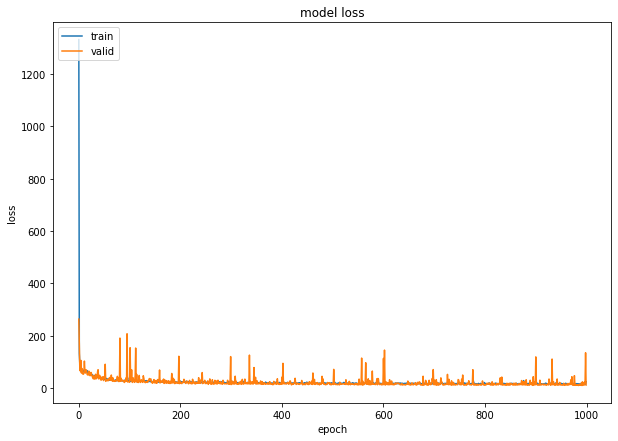

In [122]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [123]:
mse_test = mse((y_test + 0.5)*delta, (model.predict(X_test) + 0.5)*delta, squared=False)
mse_train = mse((y_train + 0.5)*delta, (model.predict(X_train) + 0.5)*delta, squared=False)
print("MSE for test is", mse_test, "and MSE for train is", mse_train)

MSE for test is 19.122626611877813 and MSE for train is 19.434926616026573


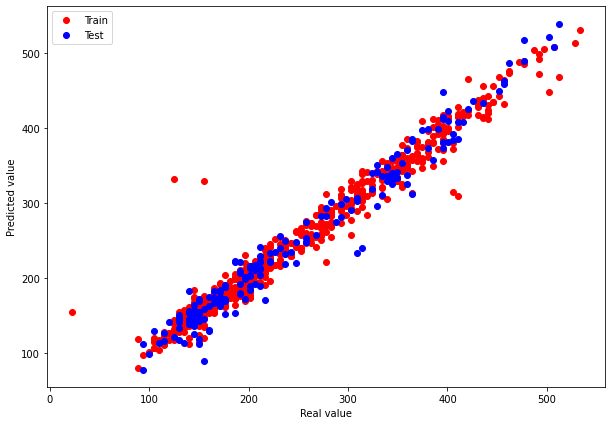

In [124]:
fig = plt.figure(figsize=(10,7))

plt.plot((y_train + 0.5)*delta, (model.predict(X_train) + 0.5)*delta, 'or', label='Train')
plt.plot((y_test + 0.5)*delta, (model.predict(X_test) + 0.5)*delta, 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

In [126]:
model.save("for_7th_model")

INFO:tensorflow:Assets written to: for_7th_model/assets
